In [1]:
# 確保安裝必要的套件
!pip install tensorflow numpy matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# 確認是否使用 GPU
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "not available")


GPU is available


In [3]:
# 載入 CIFAR-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 正規化資料到 [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot 編碼
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [12]:
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    # 添加自定義分類層
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model


In [13]:
def create_vgg19_model():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    # 添加自定義分類層
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model


In [14]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64):
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=epochs,
                        batch_size=batch_size)

    return history


In [15]:
vgg16_model = create_vgg16_model()
print("Training VGG16...")
vgg16_history = train_model(vgg16_model, x_train, y_train, x_test, y_test)


Training VGG16...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step - accuracy: 0.1891 - loss: 2.0720 - val_accuracy: 0.3318 - val_loss: 1.6233
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3808 - loss: 1.5311 - val_accuracy: 0.5322 - val_loss: 1.2005
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5453 - loss: 1.2034 - val_accuracy: 0.5854 - val_loss: 1.1474
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.6452 - loss: 0.9968 - val_accuracy: 0.7000 - val_loss: 0.8742
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7254 - loss: 0.8105 - val_accuracy: 0.7124 - val_loss: 0.8406
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.7620 - loss: 0.7094 - val_accuracy: 0.7536 - val_loss: 0.7620
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.7955 - loss: 0.6287 - val_accuracy: 0.7583 - val_loss: 0.8338
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8137

In [16]:
vgg19_model = create_vgg19_model()
print("Training VGG19...")
vgg19_history = train_model(vgg19_model, x_train, y_train, x_test, y_test)


Training VGG19...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.1606 - loss: 2.1505 - val_accuracy: 0.2555 - val_loss: 1.8019
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 57ms/step - accuracy: 0.2770 - loss: 1.7677 - val_accuracy: 0.3647 - val_loss: 1.5493
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.3656 - loss: 1.5759 - val_accuracy: 0.4509 - val_loss: 1.3932
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.4521 - loss: 1.4100 - val_accuracy: 0.4977 - val_loss: 1.4083
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5581 - loss: 1.2294 - val_accuracy: 0.5980 - val_loss: 1.1789
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.6180 - loss: 1.0875 - val_accuracy: 0.6396 - val_loss: 1.1655
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.6442 - loss: 1.0201 - val_accuracy: 0.6765 - val_loss: 0.9555
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.7019

In [17]:
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


In [18]:
print("Evaluating VGG16...")
evaluate_model(vgg16_model, x_test, y_test)

print("Evaluating VGG19...")
evaluate_model(vgg19_model, x_test, y_test)


Evaluating VGG16...
Test Accuracy: 77.95%
Evaluating VGG19...
Test Accuracy: 73.39%


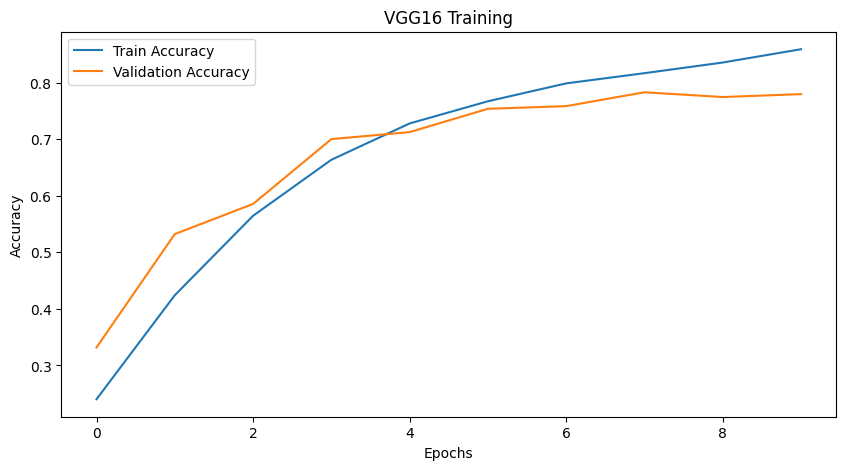

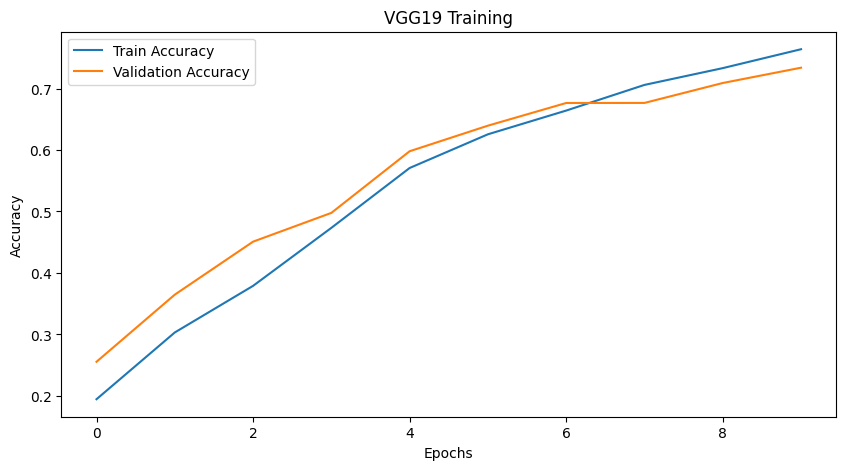

In [19]:
import matplotlib.pyplot as plt
def plot_training(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training(vgg16_history, "VGG16 Training")
plot_training(vgg19_history, "VGG19 Training")
